## **0. Tải dữ liệu**
**Lưu ý:** Nếu bạn không thể sử dụng lệnh gdown để tải bộ dữ liệu vì bị giới hạn số lượt tải, hãy tải bộ dữ liệu thử công và upload lên google drive của mình. Sau đó, sử dụng lệnh dưới đây để copy file dữ liệu vào colab:
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [ ]:
# Aloe: https://drive.google.com/file/d/1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn/view?usp=drive_link
!gdown --id 1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
!unzip Aloe_images.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wxmiUdqMciuTOs0ouKEISl8-iTVXdOWn
To: /content/Aloe_images.zip
100% 1.32M/1.32M [00:00<00:00, 165MB/s]
Archive:  Aloe_images.zip
  inflating: Aloe/Aloe_left_1.png    
  inflating: Aloe/Aloe_right_3.png   
  inflating: Aloe/Aloe_right_1.png   
  inflating: Aloe/Aloe_right_2.png   
  inflating: Aloe/Disparity_map_corr.png  


## **1. Cài đặt thuật toán**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def cosine_similarity(x, y):
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)

    return numerator / denominator

In [ ]:
def window_based_matching(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_optimal  = -1

            for j in range(disparity_range):
                d = x - j
                cost = -1
                if (d - kernel_half) > 0:
                    wp = left[(y-kernel_half):(y+kernel_half)+1, (x-kernel_half):(x+kernel_half)+1]
                    wqd = right[(y-kernel_half):(y+kernel_half)+1, (d-kernel_half):(d+kernel_half)+1]

                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()

                    cost = cosine_similarity(wp_flattened, wqd_flattened)

                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite('window_based_cosine_similarity.png', depth)
        cv2.imwrite('window_based_cosine_similarity_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

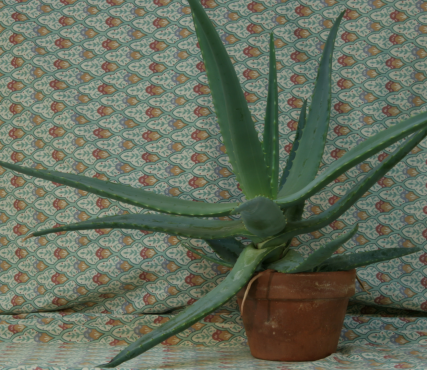

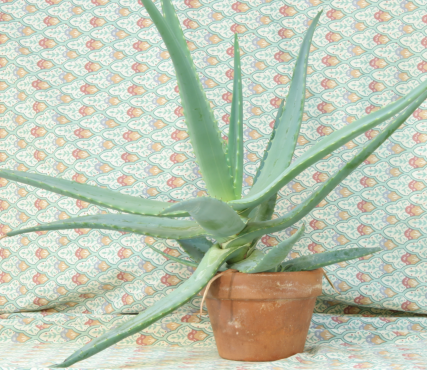

In [ ]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

cv2_imshow(left)
cv2_imshow(right)

Done.


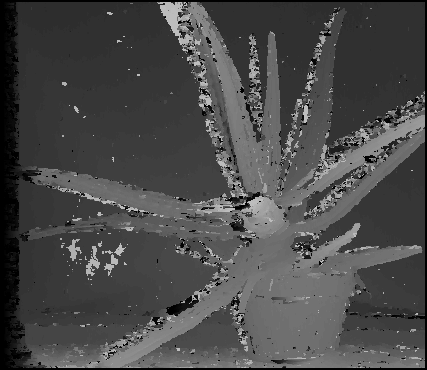

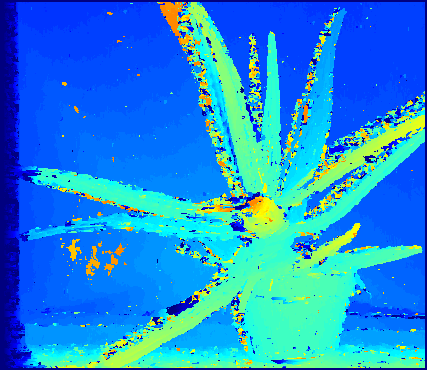

In [ ]:
depth = window_based_matching(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)
cv2_imshow(depth)
cv2_imshow(cv2.applyColorMap(depth, cv2.COLORMAP_JET))